<a href="https://colab.research.google.com/github/sasvanthu/CODSOFT_CUSTOMER-CHURN-PREDICTION/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Error loading data from GitHub: Error tokenizing data. C error: Expected 1 fields in line 43, saw 69
. Generating a dummy dataset for demonstration.

Dummy Data created for demonstration:
   customer_id  age  gender  subscription_duration_months  monthly_bill  \
0            1   49  Female                            29     47.805209   
1            2   56    Male                            57    137.247041   
2            3   68  Female                            29     36.165419   
3            4   56  Female                             6     81.579197   
4            5   36    Male                            41     50.446835   

   data_usage_gb  customer_service_calls   contract_type    payment_method  \
0      70.658505                       8  Month-to-month  Electronic check   
1      23.004655                       6  Month-to-month       Credit card   
2      88.713820                       2        Two year  Electronic check   
3      37.741971                       3        O

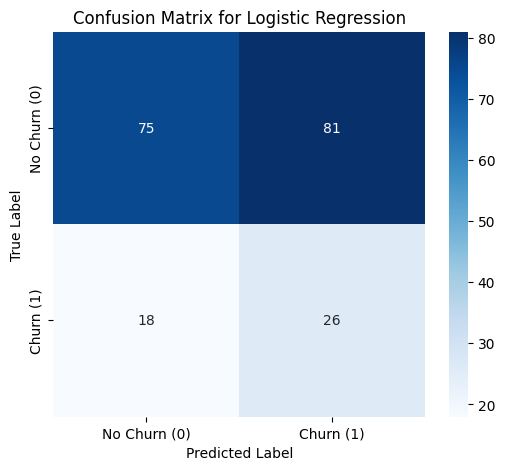

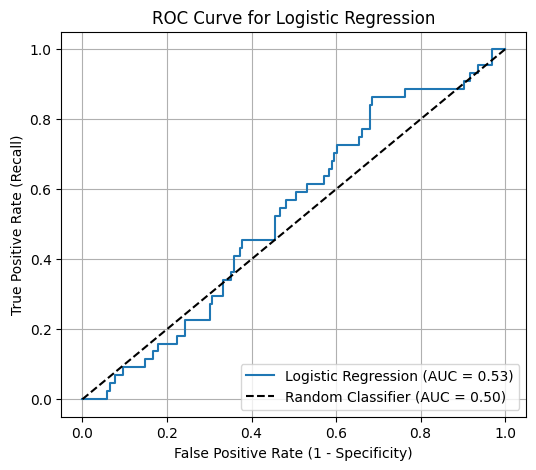


--- Training Random Forest ---

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.78      0.99      0.87       156
           1       0.00      0.00      0.00        44

    accuracy                           0.78       200
   macro avg       0.39      0.50      0.44       200
weighted avg       0.61      0.78      0.68       200

ROC AUC Score for Random Forest: 0.5510


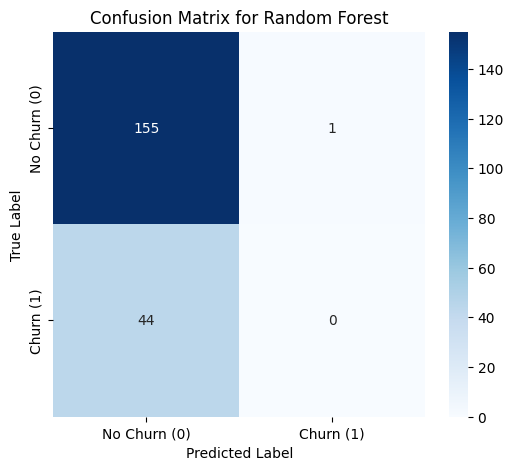

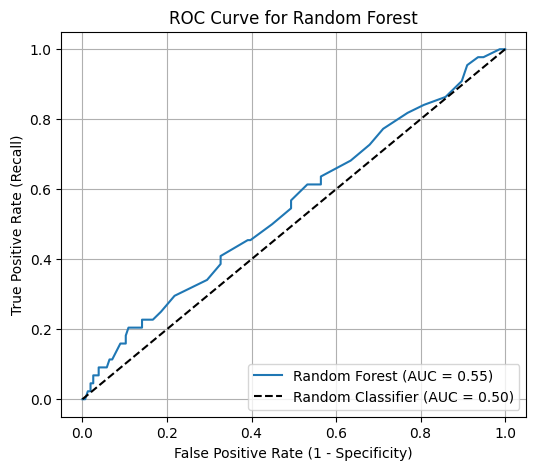


--- Training Gradient Boosting ---

Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.77      0.96      0.86       156
           1       0.00      0.00      0.00        44

    accuracy                           0.75       200
   macro avg       0.39      0.48      0.43       200
weighted avg       0.60      0.75      0.67       200

ROC AUC Score for Gradient Boosting: 0.5154


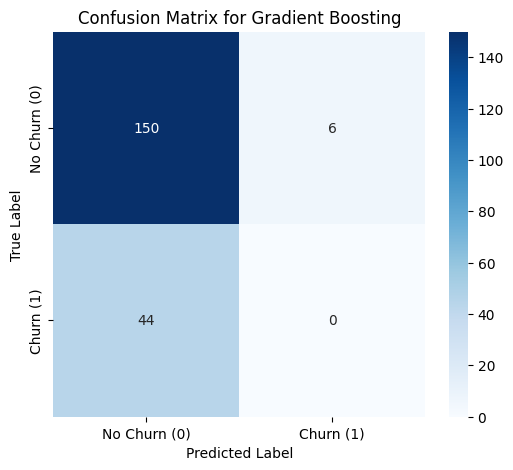

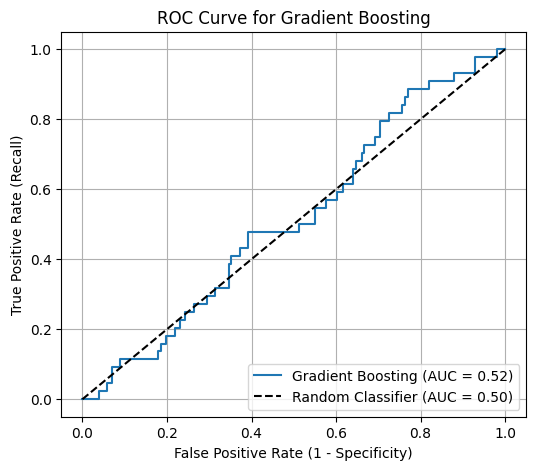


--- Best Model based on ROC AUC: Random Forest ---
ROC AUC: 0.5510

Feature Importances (Random Forest):
                             feature  importance
2                      monthly_bill    0.150287
3                     data_usage_gb    0.146877
5                       total_spent    0.143803
0                               age    0.134219
1      subscription_duration_months    0.131014
4            customer_service_calls    0.091157
6                     gender_Female    0.019344
9      contract_type_Month-to-month    0.019093
14  payment_method_Electronic check    0.018926
7                       gender_Male    0.018606


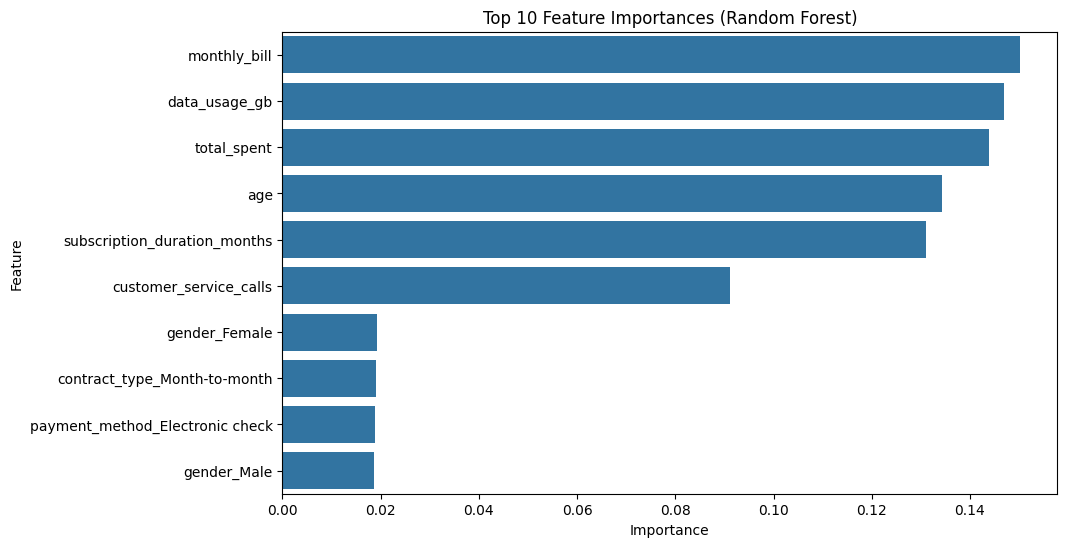

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

try:
    # Changed to load data from a GitHub raw CSV URL
    github_csv_url = 'https://github.com/sasvanthu/CODSOFT_CUSTOMER-CHURN-PREDICTION/blob/f874155e21f499d6d4f39c3d615b489ed50d9bcf/Churns%20(Bank).csv'
    df = pd.read_csv(github_csv_url)
    print(f"Data loaded successfully from GitHub: {github_csv_url}")
    print(df.head())
    print(df.info())
except Exception as e:
    print(f"Error loading data from GitHub: {e}. Generating a dummy dataset for demonstration.")
    data = {
        'customer_id': range(1, 1001),
        'age': np.random.randint(18, 70, 1000),
        'gender': np.random.choice(['Male', 'Female', 'Other'], 1000, p=[0.48, 0.48, 0.04]),
        'subscription_duration_months': np.random.randint(1, 60, 1000),
        'monthly_bill': np.random.uniform(20, 150, 1000),
        'data_usage_gb': np.random.uniform(5, 100, 1000),
        'customer_service_calls': np.random.randint(0, 10, 1000),
        'contract_type': np.random.choice(['Month-to-month', 'One year', 'Two year'], 1000, p=[0.5, 0.3, 0.2]),
        'payment_method': np.random.choice(['Credit card', 'Bank transfer', 'Electronic check', 'Mailed check'], 1000),
        'has_online_security': np.random.choice(['Yes', 'No'], 1000),
        'total_spent': np.random.uniform(50, 5000, 1000),
        'churn': np.random.choice([0, 1], 1000, p=[0.75, 0.25])
    }
    df = pd.DataFrame(data)
    print("\nDummy Data created for demonstration:")
    print(df.head())
    print(df.info())

TARGET = 'churn' # Changed target column name to 'churn'
FEATURES = [col for col in df.columns if col not in ['customer_id', 'RowNumber', 'Surname', TARGET]]

X = df[FEATURES]
y = df[TARGET] # Use the correct target column name

numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

print(f"\nIdentified Numerical Features: {numerical_features}")
print(f"Identified Categorical Features: {categorical_features}")

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Churn rate in training set: {y_train.mean():.2f}")
print(f"Churn rate in testing set: {y_test.mean():.2f}")

models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced', max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1)
}

results = {}

for name, model in models.items():
    print(f"\n--- Training {name} ---")

    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred))

    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC AUC Score for {name}: {roc_auc:.4f}")

    results[name] = {
        'model': pipeline,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'roc_auc': roc_auc
    }

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Churn (0)', 'Churn (1)'],
                yticklabels=['No Churn (0)', 'Churn (1)'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

best_model_name = max(results, key=lambda k: results[k]['roc_auc'])
print(f"\n--- Best Model based on ROC AUC: {best_model_name} ---")
print(f"ROC AUC: {results[best_model_name]['roc_auc']:.4f}")

if best_model_name in ['Random Forest', 'Gradient Boosting']:
    best_tree_model = results[best_model_name]['model'].named_steps['classifier']

    # The code for feature importance here assumes the columns in X after transformation
    # retain a clear mapping to the original feature names.
    # For OneHotEncoder, this is handled by get_feature_names_out().

    onehot_encoder = results[best_model_name]['model'].named_steps['preprocessor'].named_transformers_['cat']
    ohe_feature_names = onehot_encoder.get_feature_names_out(categorical_features)
    all_feature_names = numerical_features + list(ohe_feature_names)

    importances = best_tree_model.feature_importances_
    feature_importances_df = pd.DataFrame({'feature': all_feature_names, 'importance': importances})
    feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)
    print(f"\nFeature Importances ({best_model_name}):\n", feature_importances_df.head(10))

    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importances_df.head(10))
    plt.title(f'Top 10 Feature Importances ({best_model_name})')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

elif best_model_name == 'Logistic Regression':
    best_lr_model = results['Logistic Regression']['model'].named_steps['classifier']

    onehot_encoder = results[best_model_name]['model'].named_steps['preprocessor'].named_transformers_['cat']
    ohe_feature_names = onehot_encoder.get_feature_names_out(categorical_features)
    all_feature_names = numerical_features + list(ohe_feature_names)

    coefficients = best_lr_model.coef_[0]
    coef_df = pd.DataFrame({'feature': all_feature_names, 'coefficient': coefficients})
    coef_df['abs_coefficient'] = np.abs(coef_df['coefficient'])
    coef_df = coef_df.sort_values(by='abs_coefficient', ascending=False)
    print("\nFeature Coefficients (Logistic Regression):\n", coef_df.head(10))

    plt.figure(figsize=(10, 6))
    sns.barplot(x='coefficient', y='feature', data=coef_df.head(10))
    plt.title('Top 10 Feature Coefficients (Logistic Regression)')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.show()